In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
generator = tf.keras.models.load_model('./trained_models/gan_50_generator.h5')

2022-05-20 08:35:34.756189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


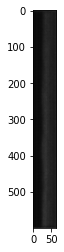

In [3]:
BATCH_SIZE = 5
noise_dim = 100

noise = tf.random.normal([BATCH_SIZE, noise_dim])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [4]:
from postprocessing import vecToMidi

In [9]:
genMidi = vecToMidi(generated_image[0, :, :, 0].numpy().astype(int), resolution=5, noterange=64)
genMidi

MidiFile(type=1, ticks_per_beat=480, tracks=[
  MidiTrack()
])

In [10]:
import mido

In [11]:
genMidi.save('samples/generated_midi.mid')